In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15,10
from myPyLib.Mollweide import moll

In [2]:
m = moll(lat_range=(-5,85))#, xsize=180, ysize=90, lon_center=120)
g = moll()

In [3]:
nowt = np.loadtxt('nowt_field_tag.txt')

In [4]:
n_field = nowt.shape[0]
tag = np.zeros(n_field)
fid = nowt[:,0]
ra = nowt[:,1]
de = nowt[:,2]
gl = nowt[:,3]
gb = nowt[:,4]
ta = nowt[:,5]

In [6]:
#from astropy.io import ascii
#nt = ascii.read('nowt_field_tag.txt')
#nt

In [5]:
ix1 = np.where(nowt[:,5] == 1)[0]
ix0 = np.where(nowt[:,5] == 0)[0]
nt1 = nowt[ix1,:]
nt0 = nowt[ix0,:]

In [6]:
def line (dec, ra0, dec0, ra1, dec1) :
    ra = (dec - float(dec0)) * (ra1 - ra0) / (dec1 - dec0) + ra0
    return ra
def between (a, low, high) :
    return (low <= a) & (a < high)

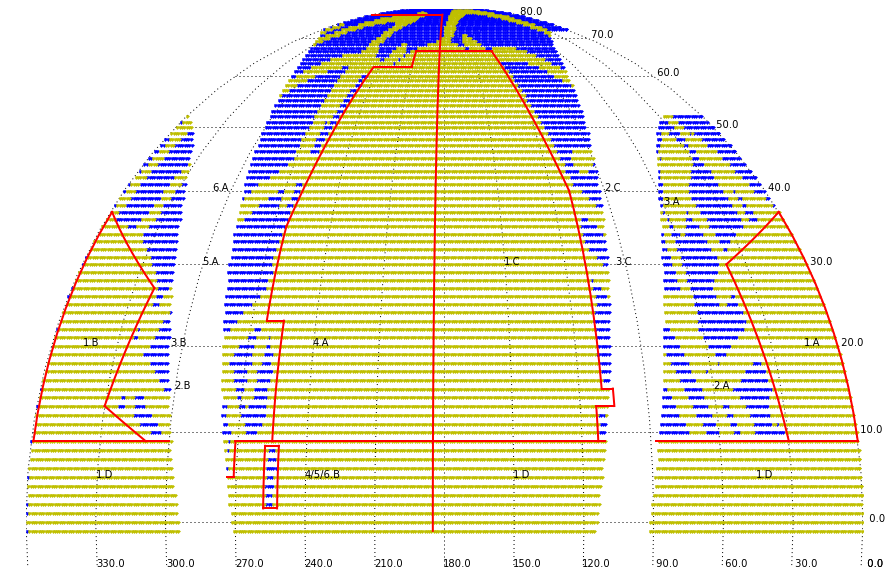

In [9]:
m.grid(lat_step=10, lon_step=30, lat_lab_lon=0, lon_lab_lat=-5)
m.scatter(nt0[:,1], nt0[:,2], 'b.')
m.scatter(nt1[:,1], nt1[:,2], 'y.')
m.text( 45,  5, "1.D")
m.text(150,  5, "1.D")
m.text(-30,  5, "1.D")
m.text( 15, 20, "1.A")
m.text( 60, 15, "2.A")
m.text( 60, 38, "3.A")
m.polyline([30, 40,  0, 0],
           [ 9, 30, 37, 9], "r-", close=True, linewidth=2)
m.text(-15, 20, "1.B")
m.text(-60, 15, "2.B")
m.text(-55, 20, "3.B")

m.polyline([-50, -30, -40, -1, -1], 
           [  9,  13,  27, 37,  9], "r-", close=True, linewidth=2)
m.text(150, 30, "1.C")
m.text( 90, 40, "2.C")
m.text( 95, 30, "3.C")
m.polyline([185, 185, 185, 130, 110, 110, 105, 105, 113, 113, 110, 185],
           [ -1,   9,  66,  66,  40,  15,  15,  13,  13,   9,   9,   9], "r-", linewidth=2)
m.polyline([-30, -60],
           [  9,   9], "r-", linewidth=2)
m.polyline([30, 88],
           [ 9,  9], "r-", linewidth=2)

m.text(240, 5, "4/5/6.B")
m.text(240, 20, "4.A")
m.text(300, 30, "5.A")
m.text(310, 40, "6.A")
m.polyline([185, 255, 255, 263, 263,  245, 210, 210, 185], 
           [  9,   9,  23,  23,  35,   62,  62,  66,  66], "r-", linewidth=2)
m.polyline([255, 271, 271, 274],
           [  9,   9,   5,   5], "r-", linewidth=2)
m.polyline([252, 252, 258, 258],
           [8.5, 1.5, 1.5, 8.5], "r-", linewidth=2, close=True)
m.polyline([185, 185, 359],
           [ 66,  80,  80], "r-", linewidth=2)

# 6 Types:
*condition in [ ] will be active in following details*

1. SDSS Yes and New Plan Not +- [oldtag == 1]
    1. gb < 0 [&& 0 <= ra <= 100]
        1. 9.5 <= dec <= 30 && 0 <= ra < line(30, 9, 40, 30)
        2. 30 <= dec <= 37 && 0 <= ra < line(40, 30, 0, 37)
    2. gb < 0 [&& -70(290) <= ra <= 0(360)]
        3. 9.5 <= dec < 13 && line(-50, 10, -30, 13) < ra < 0
        4. 13 <= dec < 27 && line(-30, 13, -40, 27) < ra < 0
        5. 27 <= dec < 37 && line(-40, 27, 0, 37) < ra < 0
    3. 0 < gb [&& ra < 185]
        6. 9.5 <= dec < 13 && 113 < ra < 185
        7. 13 <= dec < 15 && ra < 185
        8. 15 <= dec < 40 && 110 < ra < 185
        9. 40 <= dec < 66 && line(110, 40, 130, 66) < ra < 185
    4. -1.5 <= dec < 9.5 && 100 <= ra <= 185
2. SDSS Not and New Plan Yes -+ [oldtag == 0]
    1. oldtag == 0 && gb < 0 [&& 0 <= ra <= 100]
        1. 9.5 <= dec <= 30 && line(30, 9, 40, 30) <= ra < 100
        2. 30 <= dec < 37 && line(40, 30, 0, 37) <= ra < 100
        0. 37 <= dec < 55 && all
    2. oldtag == 0 && gb < 0 [&& -70(290) <= ra <= 0(360)]
        3. 9.5 <= dec < 13 && -70 < ra <= line(-50, 10, -30, 13)
        4. 13 <= dec < 27 && -70 < ra <= line(-30, 13, -40, 27)
        5. 27 <= dec < 37 && -70 < ra <= line(-40, 27, 0, 37)
        0. 37 <= dec < 55 && all
    3. oldtag == 0 && 0 < gb [&& ra < 185]
        6. 9.5 <= dec < 13 && ra <= 113
        7. 13 <= dec < 15 && None
        8. 15 <= dec < 40 && ra <= 110
        9. 40 <= dec < 66 && ra <= line(110, 40, 130, 66)
        0. 66 <= dec < 80 && ra < 185
        1. 80 <= dec < 90 && all
3. SDSS Yes and New Plan Yes ++ [oldtag == 1]
    1. oldtag == 1 && gb < 0 [&& 0 <= ra <= 100]
        1. 9.5 <= dec <= 30 && line(30, 9, 40, 30) <= ra < 100
        2. 30 <= dec <= 37 && line(40, 30, 0, 37) <= ra < 100
    2. oldtag == 1 && gb < 0 [&& -70(290) <= ra <= 0(360)]
        3. 9.5 <= dec < 13 && -70 < ra <= line(-50, 10, -30, 13)
        4. 13 <= dec < 27 && -70 < ra <= line(-30, 13, -40, 27)
        5. 27 <= dec < 37 && -70 < ra <= line(-40, 27, 0, 37)
    3. oldtag == 1 && 0 < gb [&& ra < 185]
        6. 9.5 <= dec < 13 && ra <= 113
        7. 13 <= dec < 15 && None
        8. 15 <= dec < 40 && ra <= 110
        9. 40 <= dec < 66 && ra <= line(110, 40, 130, 66)
        0. 66 <= dec < 80 && ra < 185
        1. 80 <= dec < 90 && all
4. SDSS Yes and S&S Plan Not +- [oldtag == 1]
    1. 0 < gb && 185 < ra [&& 9.5 <= dec < 66]
        1. 9  <= dec < 23 && 185 < ra < 255
        2. 23 <= dec < 35 && 185 < ra < 263
        3. 35 <= dec < 62 && 185 < ra < line(35, 263, 62, 245)
        4. 62 <= dec < 66 && 185 < ra < 210
    2. -1.5 <= dec < 9.5
        1. 270 < ra < 275 && dec < 5
        2. 252 < ra < 258 && dec < 1.5
        3. other all
5. SDSS Not and S&S Plan Yes -+ [oldtag == 0]
    1. 0 < gb && 185 < ra [&& 9.5 <= dec < 66]
        1. 9  <= dec < 23 && 255 <= ra
        2. 23 <= dec < 35 && 263 <= ra
        3. 35 <= dec < 62 && line(35, 263, 62, 245) <= ra
        4. 62 <= dec < 66 && 210 <= ra
        5. 66 <= dec < 80 && all
    2. -1.5 <= dec < 9.5
        1. 270 < ra < 275 && 5 <= dec
        2. 252 < ra < 258 && 1.5 <= dec
6. SDSS Yes and S&S Plan Yes ++ [oldtag == 1]
    1. 0 < gb && 185 < ra [&& 9.5 <= dec < 66]
        1. 9  <= dec < 23 && 255 <= ra
        2. 23 <= dec < 35 && 263 <= ra
        3. 35 <= dec < 62 && line(35, 263, 62, 245) <= ra
        4. 62 <= dec < 66 && 210 <= ra
        5. 66 <= dec < 80 && all
    2. -1.5 <= dec < 9.5
        1. 270 < ra < 275 && 5 <= dec
        2. 252 < ra < 258 && 1.5 <= dec

In [10]:
# 1. SDSS Yes and New Plan Not +- [oldtag == 1]
#     1. gb < 0 [&& 0 <= ra <= 100]
#         1. 9.5 <= dec <= 30 && 0 <= ra < line(30, 9, 40, 30)
ix = np.where( (gb < 0) & (between(de, 9.5, 30) & between(ra, 0, line(de,30,9,40,30))) )[0]
tag[ix] = 1

#         2. 30 <= dec <= 37 && 0 <= ra < line(40, 30, 0, 37)
ix = np.where( (gb < 0) & (between(de, 30, 37) & between(ra, 0, line(de,40,30,0,37))) )[0]
tag[ix] = 1

#     2. gb < 0 [&& -70(290) <= ra <= 0(360)]
#         3. 9.5 <= dec < 13 && line(-50, 10, -30, 13) < ra < 0
ix = np.where( (gb < 0) & (between(de, 9.5, 13) & between(ra, line(de,310,9,330,13), 361)) )[0]
tag[ix] = 1

#         4. 13 <= dec < 27 && line(-30, 13, -40, 27) < ra < 0
ix = np.where( (gb < 0) & (between(de, 13, 27) & between(ra, line(de,330,13,320,27), 361)) )[0]
tag[ix] = 1

#         5. 27 <= dec < 37 && line(-40, 27, 0, 37) < ra < 0
ix = np.where( (gb < 0) & (between(de, 27, 37) & between(ra, line(de,320,27,360,37), 361)) )[0]
tag[ix] = 1

#     3. 0 < gb [&& ra < 185]
#         6. 9.5 <= dec < 13 && 113 < ra < 185
ix = np.where( (gb > 0) & (between(de, 9.5, 13) & between(ra, 113, 185)) )[0]
tag[ix] = 1

#         7. 13 <= dec < 15 && ra < 185
ix = np.where( (gb > 0) & (between(de, 13, 15) & between(ra, 90, 185)) )[0]
tag[ix] = 1

#         8. 15 <= dec < 40 && 110 < ra < 185
ix = np.where( (gb > 0) & (between(de, 15, 40) & between(ra, 110, 185)) )[0]
tag[ix] = 1

#         9. 40 <= dec < 66 && line(110, 40, 130, 66) < ra < 185
ix = np.where( (gb > 0) & (between(de, 40, 66) & between(ra, line(de,110,40,130,66), 185)) )[0]
tag[ix] = 1

#     4. -1.5 <= dec < 9.5 && 280(-80) <= ra <= 185
ix = np.where( (between(de, -5, 9.5) & between(ra, 0, 185)) )[0]
tag[ix] = 1
ix = np.where( (between(de, -5, 9.5) & between(ra, 280, 361)) )[0]
tag[ix] = 1

# 2,3. SDSS Yes/No and New Plan Yes -+ / ++ [oldtag == 1]
#     1. oldtag == 1 && gb < 0 [&& 0 <= ra <= 100]
#         1. 9.5 <= dec <= 30 && line(30, 9, 40, 30) <= ra < 100
ix = np.where( (gb < 0) & (between(de, 9.5, 30) & between(ra, line(de, 30, 9, 40, 30), 100)) )[0]
tag[ix] = ta[ix] + 2

#         2. 30 <= dec <= 37 && line(40, 30, 0, 37) <= ra < 100
ix = np.where( (gb < 0) & (between(de, 30, 37) & between(ra, line(de, 40, 30, 0, 37), 100)) )[0]
tag[ix] = ta[ix] + 2

#     2. oldtag == 1 && gb < 0 [&& -70(290) <= ra <= 0(360)]
#         3. 9.5 <= dec < 13 && -70 < ra <= line(-50, 10, -30, 13)
ix = np.where( (gb < 0) & (between(de, 9.5, 13) & between(ra, 290, line(de,310,9,330,13))) )[0]
tag[ix] = ta[ix] + 2

#         4. 13 <= dec < 27 && -70 < ra <= line(-30, 13, -40, 27)
ix = np.where( (gb < 0) & (between(de, 13, 27) & between(ra, 290, line(de,330,13,320,27))) )[0]
tag[ix] = ta[ix] + 2

#         5. 27 <= dec < 37 && -70 < ra <= line(-40, 27, 0, 37)
ix = np.where( (gb < 0) & (between(de, 27, 37) & between(ra, 290, line(de,320,27,360,37))) )[0]
tag[ix] = ta[ix] + 2

#         0. 37 <= dec < 55 && all
ix = np.where( (gb < 0) & (between(de, 37, 55) ) )[0]
tag[ix] = ta[ix] + 2

#     3. oldtag == 1 && 0 < gb [&& ra < 185]
#         6. 9.5 <= dec < 13 && ra <= 113
ix = np.where( (gb > 0) & (between(de, 9.5, 13) & between(ra, 0, 113)) )[0]
tag[ix] = ta[ix] + 2

#         7. 13 <= dec < 15 && None

#         8. 15 <= dec < 40 && ra <= 110
ix = np.where( (gb > 0) & (between(de, 15, 40) & between(ra, 0, 110)) )[0]
tag[ix] = ta[ix] + 2

#         9. 40 <= dec < 66 && ra <= line(110, 40, 130, 66)
ix = np.where( (gb > 0) & (between(de, 40, 66) & between(ra, 0, line(de,110,40,130,66))) )[0]
tag[ix] = ta[ix] + 2

#         0. 66 <= dec < 80 && ra < 185
ix = np.where( (gb > 0) & (between(de, 66, 80) & between(ra, 0, 185)) )[0]
tag[ix] = ta[ix] + 2

#         1. 80 <= dec < 90 && all
ix = np.where( (gb > 0) & (between(de, 80, 91)) )[0]
tag[ix] = ta[ix] + 2


# 4. SDSS Yes and S&S Plan Not +- [oldtag == 1]
#     1. 0 < gb && 185 < ra [&& 9.5 <= dec < 66]
#         1. 9  <= dec < 23 && 185 < ra < 255
ix = np.where( (gb > 0) & (between(de, 9.5, 23) & between(ra, 185, 255)) )[0]
tag[ix] = 4

#         2. 23 <= dec < 35 && 185 < ra < 263
ix = np.where( (gb > 0) & (between(de, 23, 35) & between(ra, 185, 263)) )[0]
tag[ix] = 4

#         3. 35 <= dec < 62 && 185 < ra < line(263, 35, 245, 62)
ix = np.where( (gb > 0) & (between(de, 35, 62) & between(ra, 185, line(de, 263, 35, 245, 62))) )[0]
tag[ix] = 4

#         4. 62 <= dec < 66 && 185 < ra < 210
ix = np.where( (gb > 0) & (between(de, 62, 66) & between(ra, 185, 210)) )[0]
tag[ix] = 4

#     2. -1.5 <= dec < 9.5
#         1. 270 < ra < 275 && dec < 5
#         2. 252 < ra < 258 && dec < 1.5
#         3. other all
ix = np.where( (gb > 0) & (between(de, -5, 9.5) & between(ra, 185, 280)) )[0]
tag[ix] = 4 # set all to 4, the following will set 2 boxes


# 5,6. SDSS Yes/No and S&S Plan Yes -+/++ [oldtag == 0/1]
#     1. 0 < gb && 185 < ra [&& 9.5 <= dec < 66]
#         1. 9  <= dec < 23 && 255 <= ra
ix = np.where( (gb > 0) & (between(de, 9.5, 23) & between(ra, 255, 360)) )[0]
tag[ix] = ta[ix] + 5

#         2. 23 <= dec < 35 && 263 <= ra
ix = np.where( (gb > 0) & (between(de, 23, 35) & between(ra, 263, 360)) )[0]
tag[ix] = ta[ix] + 5

#         3. 35 <= dec < 62 && line(263, 35, 245, 62) <= ra
ix = np.where( (gb > 0) & (between(de, 35, 62) & between(ra, line(de, 263, 35, 245, 62), 360)) )[0]
tag[ix] = ta[ix] + 5

#         4. 62 <= dec < 66 && 210 <= ra
ix = np.where( (gb > 0) & (between(de, 62, 66) & between(ra, 210, 360)) )[0]
tag[ix] = ta[ix] + 5

#        5. 66 <= dec < 80 && all
ix = np.where( (gb > 0) & (between(de, 66, 80) & between(ra, 185, 360)) )[0]
tag[ix] = ta[ix] + 5
    
#     2. -1.5 <= dec < 9.5
#         1. 270 < ra < 275 && 5 <= dec
ix = np.where( (gb > 0) & (between(de, 5, 10) & between(ra, 270, 275)) )[0]
tag[ix] = ta[ix] + 5

#         2. 252 < ra < 258 && 1.5 <= dec
ix = np.where( (gb > 0) & (between(de, 1.5, 10) & between(ra, 252, 258)) )[0]
tag[ix] = ta[ix] + 5



(1, 'y', 7112)
(2, 'b', 2523)
(3, 'r', 1731)
(4, 'm', 3889)
(5, 'g', 1372)
(6, 'c', 910)


(-0.05, 1.0)

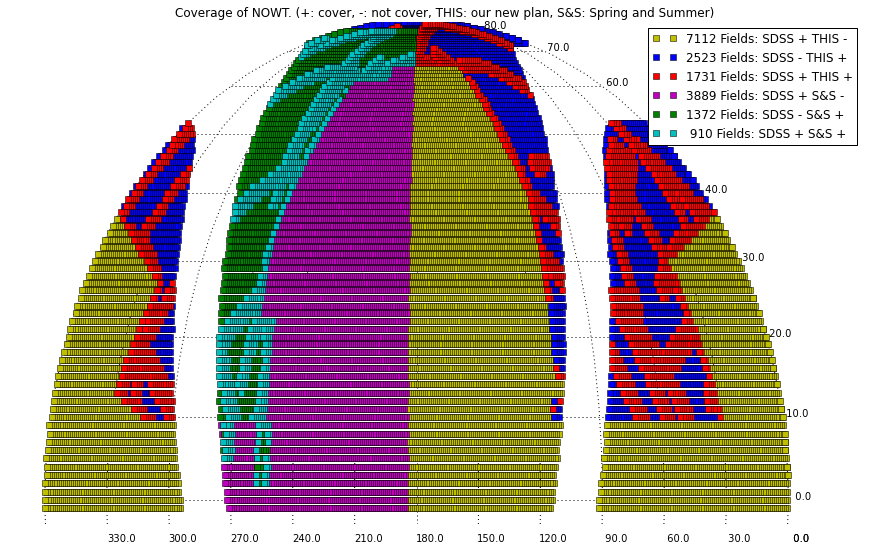

In [15]:
plt.rcParams['figure.figsize'] = 15,9
m.grid(lat_step=10, lon_step=30, lat_lab_lon=0, lon_lab_lat=-5)
#m.scatter(ra, de, 'k.')
color=["k","y","b","r","m","g","c"]
note = ["" ,
        "SDSS + THIS -",
        "SDSS - THIS +",
        "SDSS + THIS +",
        "SDSS + S&S -",
        "SDSS - S&S +",
        "SDSS + S&S +"]
for k in range(1, 7) :
    ix = np.where(tag == k)[0]
    n = len(ix)
    m.scatter(ra[ix], de[ix], color[k]+'s', label="%4d Fields: %s" % (n, note[k]))
    print (k, color[k], len(ix))
plt.legend()
plt.title("Coverage of NOWT. (+: cover, -: not cover, THIS: our new plan, S&S: Spring and Summer)")
plt.xlim(-1.05, 1.2)
plt.ylim(-0.05, 1.0)

In [72]:
print line(np.arange(35, 63), 35, 263, 62, 245)

[ 377.   375.5  374.   372.5  371.   369.5  368.   366.5  365.   363.5
  362.   360.5  359.   357.5  356.   354.5  353.   351.5  350.   348.5
  347.   345.5  344.   342.5  341.   339.5  338.   336.5]


In [78]:
nowt2 = np.array(nowt)

In [83]:
nowt2[:,5] = tag

In [86]:
np.savetxt('nowt_field_tag_0714.txt', nowt2, fmt='%-5d  %9.5f  %9.5f  %9.5f  %9.5f  %1d')